In [2]:
import sys
import os
import glob
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx 
%matplotlib inline

In [3]:
df_main = pd.read_csv('../../01 Data/03 Consolidated/authors_with_gender_v1.csv')

In [4]:
df_main

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[],tomoyuki,NaN
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[],yuichiro,NaN
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[],makoto,male
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[],takayuki,male
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[],hayato,NaN
...,...,...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,mikhail,male
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,a,NaN
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,f,NaN
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,a,NaN


In [5]:
df_main.gender.value_counts()

male      384809
female     45281
Name: gender, dtype: int64

### Drop those Papers for which we dont have genders for all the authors
Else, it will change our colloboration results

Method:
1. Make a column gend_count with 1/0 if gender for that author there
2. Rollup the data at paper_id level
3. Keep those papers for which number of authors = value in gen_count rolled up

In [6]:
df_main['gen_count'] = df_main['gender'].apply(lambda x: 1 if x == 'male' or x == 'female' else 0)

In [7]:
df_main.tail(5)

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,gen_count
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,mikhail,male,1
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,a,NaN,0
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,f,NaN,0
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,a,NaN,0
2503842,10.1103/PhysRevSTAB.14.090401,2011-09-15,N. Stankova,N.,Stankova,a2,n,NaN,0


In [8]:
df_gen = df_main.groupby(['paper_id']).agg({'name': 'count', 'gen_count': 'sum'}).reset_index()

In [9]:
old_data = df_gen

In [10]:
df_gen

,paper_id,name,gen_count
0,10.1103/PhysRev.1.124,1,1
1,10.1103/PhysRev.1.141,1,0
2,10.1103/PhysRev.1.154,1,0
3,10.1103/PhysRev.1.16,1,0
4,10.1103/PhysRev.1.161,1,0
...,...,...,...
626322,10.1103/RevModPhys.90.045002,2,1
626323,10.1103/RevModPhys.90.045003,1,1
626324,10.1103/RevModPhys.90.045004,3,1
626325,10.1103/RevModPhys.90.045005,4,0


In [11]:
# Drop those papers for which number of authors != number of genders available
df_gen = df_gen.drop(df_gen[df_gen.name != df_gen.gen_count].index)

In [12]:
df_gen

,paper_id,name,gen_count
0,10.1103/PhysRev.1.124,1,1
8,10.1103/PhysRev.1.211,1,1
28,10.1103/PhysRev.1.446,1,1
32,10.1103/PhysRev.1.56,1,1
35,10.1103/PhysRev.10.1,1,1
...,...,...,...
626309,10.1103/RevModPhys.90.035001,2,2
626315,10.1103/RevModPhys.90.035007,1,1
626316,10.1103/RevModPhys.90.040501,1,1
626321,10.1103/RevModPhys.90.045001,2,2


In [13]:
# Make a list of paper ids which satisfy condition to filter main data
uniq_id_list = list(df_gen.paper_id)

In [14]:
# uniq_id_list[:5]

In [15]:
# Fileter out main data for those papers for which we gender info for all the authors
df_gender = df_main[df_main['paper_id'].isin(uniq_id_list)]

In [16]:
df_gender

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,gen_count
69,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,Roman,Verba,a1,roman,male,1
70,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,Ivan,Lisenkov,a2,ivan,male,1
71,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,Ivan,Lisenkov,a3,ivan,male,1
72,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,Ilya,Krivorotov,a4,ilya,male,1
73,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,Vasil,Tiberkevich,a5,vasil,male,1
...,...,...,...,...,...,...,...,...,...
2503634,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,Roberto,Corsini,a2,roberto,male,1
2503835,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,Dmitry,Shatilov,a1,dmitry,male,1
2503836,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,Eugene,Levichev,a1,eugene,male,1
2503837,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,Evgeny,Simonov,a1,evgeny,male,1


In [17]:
# QC: No nan values present in gender
len(df_gender.gender) == len(df_gender[df_gender.gender == 'male']) + len(df_gender[df_gender.gender == 'female'])

True

In [18]:
len(df_gender.gender)

124817

In [19]:
df_gender.gender.value_counts()

# Earlier
# male      384,809
# female     45,281

male      114463
female     10354
Name: gender, dtype: int64

In [20]:
print('% of data kept is: {0:0.1%}'.format(len(set(df_gender.paper_id))/len(set(old_data.paper_id))))

% of data kept is: 8.8%


### Drop duplicacy at affiliationid level

In [21]:
# Examle of duplicacy:
df_gender[df_gender.paper_id == '10.1103/PhysRevApplied.9.064014']

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,gen_count
69,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,Roman,Verba,a1,roman,male,1
70,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,Ivan,Lisenkov,a2,ivan,male,1
71,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,Ivan,Lisenkov,a3,ivan,male,1
72,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,Ilya,Krivorotov,a4,ilya,male,1
73,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,Vasil,Tiberkevich,a5,vasil,male,1
74,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,Andrei,Slavin,a5,andrei,male,1


###### for the same paper_id an author is counted the number of times their afiliation appears

In [22]:
df = df_gender
df = df.drop_duplicates(['paper_id','name','gender'], keep='first')

In [23]:
# df

In [24]:
# QC
df.gender.value_counts()
# Earlier
# male      114,463
# female     10,354

male      101645
female      9048
Name: gender, dtype: int64

In [25]:
# QC Duplicacy:
df[df.paper_id == '10.1103/PhysRevApplied.9.064014']

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,gen_count
69,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,Roman,Verba,a1,roman,male,1
70,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,Ivan,Lisenkov,a2,ivan,male,1
72,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,Ilya,Krivorotov,a4,ilya,male,1
73,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,Vasil,Tiberkevich,a5,vasil,male,1
74,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,Andrei,Slavin,a5,andrei,male,1


In [26]:
# df.to_csv('../../01 Data/03 Consolidated/doi_uniq_for_gender_and_affil_v1.csv', index=False)

## Collab Analysis
1. Add columns
2. Group by at reqd lvl
3. Avg collab with female authors
4. Avg collab with male authors
5. Avg collab when ONLY female authors
6. Avg collab when ONLY male authors

In [27]:
df['m_colab'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)
df['f_colab'] = df['gender'].apply(lambda x: 1 if x == 'female' else 0)

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df.tail(5)

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,gen_count,m_colab,f_colab
2503634,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,Roberto,Corsini,a2,roberto,male,1,1,0
2503835,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,Dmitry,Shatilov,a1,dmitry,male,1,1,0
2503836,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,Eugene,Levichev,a1,eugene,male,1,1,0
2503837,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,Evgeny,Simonov,a1,evgeny,male,1,1,0
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,mikhail,male,1,1,0


In [29]:
# QC
print("males:",df.m_colab.sum(), "and females:", df.f_colab.sum())
# Results match

males: 101645 and females: 9048


#### Data at paper_id level

In [30]:
colab_count = df.groupby(['paper_id']).agg({'name': 'count', 'm_colab': 'sum', 'f_colab': 'sum'}).reset_index()

In [31]:
colab_count

,paper_id,name,m_colab,f_colab
0,10.1103/PhysRev.1.124,1,1,0
1,10.1103/PhysRev.1.211,1,1,0
2,10.1103/PhysRev.1.446,1,1,0
3,10.1103/PhysRev.1.56,1,1,0
4,10.1103/PhysRev.10.1,1,1,0
...,...,...,...,...
55023,10.1103/RevModPhys.90.035001,2,2,0
55024,10.1103/RevModPhys.90.035007,1,1,0
55025,10.1103/RevModPhys.90.040501,1,1,0
55026,10.1103/RevModPhys.90.045001,2,1,1


#### Overall Collaboration (across genders)

In [32]:
print("Average number of collaborators per paper: {0:0.2f}".format(np.mean(colab_count['name'])))

Average number of collaborators per paper: 2.01


#### Avg collab when female authors pressent

In [33]:
colab_count_f = colab_count[colab_count['f_colab'] > 0]

In [34]:
colab_count_f

,paper_id,name,m_colab,f_colab
29,10.1103/PhysRev.101.1034,1,0,1
43,10.1103/PhysRev.101.1821,2,1,1
66,10.1103/PhysRev.102.1366,2,1,1
147,10.1103/PhysRev.105.1676,3,2,1
162,10.1103/PhysRev.106.1182,2,1,1
...,...,...,...,...
54969,10.1103/RevModPhys.82.383,3,2,1
55005,10.1103/RevModPhys.87.61,2,1,1
55006,10.1103/RevModPhys.87.765,3,2,1
55008,10.1103/RevModPhys.88.011002,6,5,1


In [35]:
# colab_count_f.name.describe()

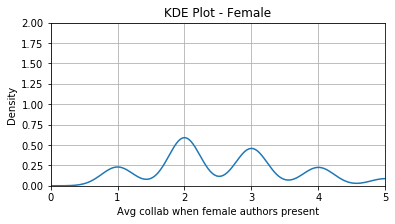

In [36]:
fig = plt.figure(figsize=(6, 3))
colab_count_f.name.plot(kind='kde')
plt.grid()
plt.axis([0, 5, 0 , 2])
plt.ylabel('Density')
plt.xlabel('Avg collab when female authors present')
plt.title('KDE Plot - Female')
plt.show()
fig.savefig('../../04 Plots/avg_collab_w_female_authors-kde')

In [37]:
print('Females: average number of collaborators per paper: {0:0.2f} authors'.format(np.mean(colab_count_f.name)))

Females: average number of collaborators per paper: 2.80 authors


#### Avg collab when male authors pressent

In [38]:
colab_count_m = colab_count[colab_count['m_colab'] > 0]

In [39]:
colab_count_m

,paper_id,name,m_colab,f_colab
0,10.1103/PhysRev.1.124,1,1,0
1,10.1103/PhysRev.1.211,1,1,0
2,10.1103/PhysRev.1.446,1,1,0
3,10.1103/PhysRev.1.56,1,1,0
4,10.1103/PhysRev.10.1,1,1,0
...,...,...,...,...
55023,10.1103/RevModPhys.90.035001,2,2,0
55024,10.1103/RevModPhys.90.035007,1,1,0
55025,10.1103/RevModPhys.90.040501,1,1,0
55026,10.1103/RevModPhys.90.045001,2,1,1


In [40]:
# colab_count_m.name.describe()

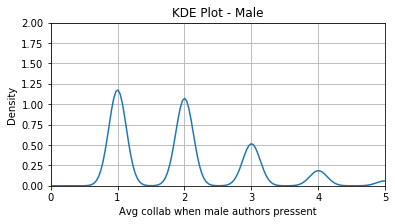

In [41]:
fig = plt.figure(figsize=(6, 3))
colab_count_m.name.plot(kind='kde')
plt.grid()
plt.axis([0, 5, 0 , 2])
plt.ylabel('Density')
plt.xlabel('Avg collab when male authors pressent')
plt.title('KDE Plot - Male')
plt.show()
fig.savefig('../../04 Plots/avg_collab_w_male_authors-kde')

In [42]:
print('Males: average number of collaborators per paper: {0:0.2f} authors'.format(np.mean(colab_count_m.name)))

Males: average number of collaborators per paper: 2.03 authors


#### Avg collab when ONLY male authors collaborate

In [43]:
colab_m_m = colab_count[(colab_count['m_colab'] > 0) & (colab_count['f_colab'] == 0)]
colab_m_m

,paper_id,name,m_colab,f_colab
0,10.1103/PhysRev.1.124,1,1,0
1,10.1103/PhysRev.1.211,1,1,0
2,10.1103/PhysRev.1.446,1,1,0
3,10.1103/PhysRev.1.56,1,1,0
4,10.1103/PhysRev.10.1,1,1,0
...,...,...,...,...
55022,10.1103/RevModPhys.90.025004,5,5,0
55023,10.1103/RevModPhys.90.035001,2,2,0
55024,10.1103/RevModPhys.90.035007,1,1,0
55025,10.1103/RevModPhys.90.040501,1,1,0


In [44]:
# colab_m_m.name.describe()

In [45]:
print('Males: average number of collaborators per paper when ONLY male collab: {0:0.2f} authors'.format(np.mean(colab_m_m.name)))

Males: average number of collaborators per paper when ONLY male collab: 1.88 authors


##### female-female

In [46]:
colab_f_f = colab_count[(colab_count['f_colab'] > 0) & (colab_count['m_colab'] == 0)]
colab_f_f

,paper_id,name,m_colab,f_colab
29,10.1103/PhysRev.101.1034,1,0,1
210,10.1103/PhysRev.107.843,1,0,1
212,10.1103/PhysRev.107.92,1,0,1
250,10.1103/PhysRev.109.1645,1,0,1
284,10.1103/PhysRev.11.21,1,0,1
...,...,...,...,...
54795,10.1103/RevModPhys.54.1183,1,0,1
54801,10.1103/RevModPhys.55.511,1,0,1
54824,10.1103/RevModPhys.60.859,1,0,1
54833,10.1103/RevModPhys.63.735,1,0,1


In [47]:
colab_f_f.name.describe()

count    1271.00000
mean        1.13454
std         0.38269
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         4.00000
Name: name, dtype: float64

In [48]:
# QC
# colab_count[colab_count['name'] >= 11]

In [80]:
print("Average number of collaborators per paper: {0:0.2f}".format(np.mean(colab_count['name'])))

Average number of collaborators per paper: 2.01


In [81]:
print('Females: average number of collaborators per paper when ONLY female collab: {0:0.2f} authors'.format(np.mean(colab_f_f.name)))

Females: average number of collaborators per paper when ONLY female collab: 1.13 authors


In [82]:
m1 = np.mean(colab_count[colab_count.m_colab > 0]['name'])
print('Males: Avg # collaborators age when [m-f, m-m, m]  = {0:0.2f} authors'.format(m1))

Males: Avg # collaborators age when [m-f, m-m, m]  = 2.03 authors


In [83]:
f1 = np.mean(colab_count[colab_count.f_colab > 0]['name'])
print('Females: Avg # collaborators age when [m-f, f-f, f]  = {0:0.2f} authors'.format(f1))

Females: Avg # collaborators age when [m-f, f-f, f]  = 2.80 authors


In [84]:
m2 = np.mean(colab_count[(colab_count['m_colab'] > 0) & (colab_count['f_colab'] == 0)]['name'])
print('Females: Avg # collaborators age when [m-m, m]  = {0:0.2f} authors'.format(m2))

Females: Avg # collaborators age when [m-m, m]  = 1.88 authors


In [85]:
f2 = np.mean(colab_count[(colab_count['f_colab'] > 0) & (colab_count['m_colab'] == 0)]['name'])
print('Females: Avg # collaborators age when [f-f, f]  = {0:0.2f} authors'.format(f2))

Females: Avg # collaborators age when [f-f, f]  = 1.13 authors


In [86]:
mf = np.mean(colab_count[(colab_count['f_colab'] > 0) & (colab_count['m_colab'] > 0)]['name'])
print('BOTH: Avg # collaborators age when [m-f]  = {0:0.2f} authors'.format(mf))

BOTH: Avg # collaborators age when [m-f]  = 3.11 authors


#### % collab across genders

In [56]:
f_only = colab_count[(colab_count['f_colab'] > 0) & (colab_count['m_colab'] == 0)]
m_only = colab_count[(colab_count['m_colab'] > 0) & (colab_count['f_colab'] == 0)]
both = colab_count[(colab_count['m_colab'] > 0) & (colab_count['f_colab'] > 0)]
print('% of papers with ONLY FEMALE authors/collaborators: {0:0.2%} papers'.format(f_only.shape[0]/colab_count.shape[0]))
print('% of papers with ONLY MALE authors/collaborators: {0:0.2%} papers'.format(m_only.shape[0]/colab_count.shape[0]))
print('% of papers with BOTH MALE & FEMALE authors/collaborators: {0:0.2%} papers'.format(both.shape[0]/colab_count.shape[0]))

% of papers with ONLY FEMALE authors/collaborators: 2.31% papers
% of papers with ONLY MALE authors/collaborators: 85.28% papers
% of papers with BOTH MALE & FEMALE authors/collaborators: 12.41% papers


### % male-female if only 2 authors

In [57]:
# colab_count

In [58]:
df_2auth = colab_count[colab_count.name == 2]

In [59]:
df_2auth.reset_index(drop=True)

,paper_id,name,m_colab,f_colab
0,10.1103/PhysRev.100.1023,2,2,0
1,10.1103/PhysRev.100.1350,2,2,0
2,10.1103/PhysRev.100.1445,2,2,0
3,10.1103/PhysRev.100.592,2,2,0
4,10.1103/PhysRev.101.1233,2,2,0
...,...,...,...,...
19018,10.1103/RevModPhys.89.015005,2,2,0
19019,10.1103/RevModPhys.89.035003,2,2,0
19020,10.1103/RevModPhys.90.010001,2,2,0
19021,10.1103/RevModPhys.90.035001,2,2,0


In [66]:
f_only = df_2auth[(df_2auth['f_colab'] > 0) & (df_2auth['m_colab'] == 0)]
m_only = df_2auth[(df_2auth['m_colab'] > 0) & (df_2auth['f_colab'] == 0)]
both = df_2auth[(df_2auth['m_colab'] > 0) & (df_2auth['f_colab'] > 0)]
print('2 Author - % of papers with ONLY FEMALE authors/collaborators: {0:0.2%} papers'.format(f_only.shape[0]/df_2auth.shape[0]))
print('2 Author - % of papers with ONLY MALE authors/collaborators: {0:0.2%} papers'.format(m_only.shape[0]/df_2auth.shape[0]))
print('2 Author - % of papers with BOTH MALE & FEMALE authors/collaborators: {0:0.2%} papers'.format(both.shape[0]/df_2auth.shape[0]))

2 Author - % of papers with ONLY FEMALE authors/collaborators: 0.71% papers
2 Author - % of papers with ONLY MALE authors/collaborators: 84.96% papers
2 Author - % of papers with BOTH MALE & FEMALE authors/collaborators: 14.33% papers


In [67]:
f_only = df_2auth[(df_2auth['f_colab'] ==2)]
m_only = df_2auth[(df_2auth['m_colab'] ==2)]
both = df_2auth[(df_2auth['m_colab'] > 0) & (df_2auth['f_colab'] > 0)]
print('2 Author - % of papers with ONLY FEMALE authors/collaborators: {0:0.2%} papers'.format(f_only.shape[0]/df_2auth.shape[0]))
print('2 Author - % of papers with ONLY MALE authors/collaborators: {0:0.2%} papers'.format(m_only.shape[0]/df_2auth.shape[0]))
print('2 Author - % of papers with BOTH MALE & FEMALE authors/collaborators: {0:0.2%} papers'.format(both.shape[0]/df_2auth.shape[0]))

2 Author - % of papers with ONLY FEMALE authors/collaborators: 0.71% papers
2 Author - % of papers with ONLY MALE authors/collaborators: 84.96% papers
2 Author - % of papers with BOTH MALE & FEMALE authors/collaborators: 14.33% papers


#### % colab when 3 or more authors

In [61]:
df_3more = colab_count[colab_count.name >= 3]

In [62]:
df_3more.reset_index(drop=True)

,paper_id,name,m_colab,f_colab
0,10.1103/PhysRev.100.947,4,4,0
1,10.1103/PhysRev.101.1047,3,3,0
2,10.1103/PhysRev.101.563,5,5,0
3,10.1103/PhysRev.102.1181,3,3,0
4,10.1103/PhysRev.102.1209,3,3,0
...,...,...,...,...
14166,10.1103/RevModPhys.87.765,3,2,1
14167,10.1103/RevModPhys.88.011002,6,5,1
14168,10.1103/RevModPhys.88.045001,3,3,0
14169,10.1103/RevModPhys.88.045006,6,6,0


In [63]:
f_only = df_3more[(df_3more['f_colab'] > 0) & (df_3more['m_colab'] == 0)]
m_only = df_3more[(df_3more['m_colab'] > 0) & (df_3more['f_colab'] == 0)]
both = df_3more[(df_3more['m_colab'] > 0) & (df_3more['f_colab'] > 0)]
print('>=3 Author - % of papers with ONLY FEMALE authors/collaborators: {0:0.2%} papers'.format(f_only.shape[0]/df_3more.shape[0]))
print('>=3 Author - % of papers with ONLY MALE authors/collaborators: {0:0.2%} papers'.format(m_only.shape[0]/df_3more.shape[0]))
print('>=3 Author - % of papers with BOTH MALE & FEMALE authors/collaborators: {0:0.2%} papers'.format(both.shape[0]/df_3more.shape[0]))

>=3 Author - % of papers with ONLY FEMALE authors/collaborators: 0.12% papers
>=3 Author - % of papers with ONLY MALE authors/collaborators: 70.94% papers
>=3 Author - % of papers with BOTH MALE & FEMALE authors/collaborators: 28.94% papers


#### Only 1 Author, as % of population

In [64]:
colab_count

,paper_id,name,m_colab,f_colab
0,10.1103/PhysRev.1.124,1,1,0
1,10.1103/PhysRev.1.211,1,1,0
2,10.1103/PhysRev.1.446,1,1,0
3,10.1103/PhysRev.1.56,1,1,0
4,10.1103/PhysRev.10.1,1,1,0
...,...,...,...,...
55023,10.1103/RevModPhys.90.035001,2,2,0
55024,10.1103/RevModPhys.90.035007,1,1,0
55025,10.1103/RevModPhys.90.040501,1,1,0
55026,10.1103/RevModPhys.90.045001,2,1,1


In [73]:
f_only_pop = colab_count[(colab_count['f_colab'] > 0) & (colab_count['name'] == 1)]
m_only_pop = colab_count[(colab_count['m_colab'] > 0) & (colab_count['name'] == 1)]
f_tot = colab_count[(colab_count['f_colab'] > 0) & (colab_count['m_colab'] == 0)]
m_tot = colab_count[(colab_count['m_colab'] > 0) & (colab_count['f_colab'] == 0)]
print('% of papers with 1 FEMALE author as % of female only paper population: {0:0.2%} papers'.format(f_only_pop.shape[0]/sum(list(f_tot.f_colab))))
print('% of papers with 1 MALE author as % of female only paper population: {0:0.2%} papers'.format(m_only_pop.shape[0]/sum(list(m_tot.m_colab))))

% of papers with 1 FEMALE author as % of female only paper population: 77.53% papers
% of papers with 1 MALE author as % of female only paper population: 23.53% papers


In [76]:
f_only_pop = colab_count[(colab_count['f_colab'] > 0) & (colab_count['name'] == 1)]
m_only_pop = colab_count[(colab_count['m_colab'] > 0) & (colab_count['name'] == 1)]
f_tot = colab_count[(colab_count['f_colab'] > 0)]
m_tot = colab_count[(colab_count['m_colab'] > 0)]
print('% of papers with 1 FEMALE author as % of female population: {0:0.2%} papers'.format(f_only_pop.shape[0]/sum(list(f_tot.f_colab))))
print('% of papers with 1 MALE author as % of male population: {0:0.2%} papers'.format(m_only_pop.shape[0]/sum(list(m_tot.m_colab))))

% of papers with 1 FEMALE author as % of female population: 12.36% papers
% of papers with 1 MALE author as % of male population: 20.38% papers


In [87]:
print('% of papers with 1 FEMALE author as % of TOTAL population: {0:0.2%} papers'.format(f_only_pop.shape[0]/colab_count.shape[0]))
print('% of papers with 1 MALE author as % of TOTAL population: {0:0.2%} papers'.format(m_only_pop.shape[0]/colab_count.shape[0]))

% of papers with 1 FEMALE author as % of TOTAL population: 2.03% papers
% of papers with 1 MALE author as % of TOTAL population: 37.65% papers
